In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter("ignore", UserWarning)

from features.utils import *

In [3]:
activities_data = loadData()
activities_data.head()

,ID de l'activité,Date de l'activité,Nom de l'activité,Type d'activité,Description de l'activité,Temps écoulé,Mesure d'effort,Équipement utilisé pour l'activité,Nom du fichier,Poids de l'athlète,...,Puissance moyenne pondérée,Nombre d'échantillons de puissance,Humidité,Vitesse du vent,Couverture nuageuse,Indice UV,Date,Time,Week,Month
0,102155537,27 déc. 2013 à 12:35:59,Enfin la reprise !,Vélo,NaN,51.60,NaN,NaN,activities/102155537.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-27,12:35:59,52,12
1,102581269,29 déc. 2013 à 12:06:22,"I2/3, pointes I4",Vélo,NaN,92.28,NaN,NaN,activities/102581269.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-29,12:06:22,52,12
2,103191732,1 janv. 2014 à 11:22:39,SG / I2 en souplesse,Vélo,NaN,145.17,NaN,NaN,activities/103191732.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01,11:22:39,1,1
3,104215700,5 janv. 2014 à 12:17:58,SG à I3 - avec Nico et Pascal,Vélo,NaN,197.43,NaN,NaN,activities/104215700.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05,12:17:58,1,1
4,106526947,15 janv. 2014 à 12:32:41,Sortie club - Fartlek,Vélo,NaN,156.48,NaN,NaN,activities/106526947.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-15,12:32:41,3,1


In [4]:
df = pd.read_csv("data/zone_data.csv", index_col = "Unnamed: 0")
df.head()

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Mesure d'effort,Puissance moyenne pondérée,intensity_score,time_z1,time_z2,time_z3,time_z4,time_z5
663,2017-09-03,11:08:17,activities/1272038048.fit.gz,67.53,39.50,138.995026,174.0,NaN,90.237099,266.073975,91.0,54.0,310.0,86.11,0.01,0.02,0.03,0.11,0.01
689,2017-10-26,14:33:17,activities/1354264574.fit.gz,59.27,29.44,140.061310,179.0,NaN,81.347870,258.270538,91.0,48.0,310.0,86.11,0.06,0.26,0.39,0.13,0.09
690,2017-10-28,12:14:35,activities/1357422018.fit.gz,117.05,51.06,101.433411,172.0,NaN,82.146042,131.771713,91.0,19.0,211.0,58.61,0.82,0.13,0.01,0.01,0.00
691,2017-10-29,07:12:07,activities/1358014051.fit.gz,101.75,40.97,125.681000,182.0,NaN,81.164803,213.772003,91.0,56.0,294.0,81.67,0.42,0.27,0.07,0.05,0.14
692,2017-10-30,15:51:33,activities/1360150637.fit.gz,35.22,19.09,123.212326,155.0,NaN,91.744896,206.869675,91.0,11.0,222.0,61.67,0.28,0.44,0.22,0.01,0.00


## Heart Rate Plots

In [5]:
plot_data = df[df.columns[14:]]
hr_times = round(plot_data.mean() * 100, 2)
# create a bar chart
plot_data = df[df.columns[14:]]
plot_data = pd.DataFrame({'HR Zone': ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5'], 
                      'Avg Time': [hr_times[0], hr_times[1], hr_times[2], 
                                   hr_times[3], hr_times[4]]})
plot_data

,HR Zone,Avg Time
0,Zone 1,33.77
1,Zone 2,25.58
2,Zone 3,18.46
3,Zone 4,13.12
4,Zone 5,4.60


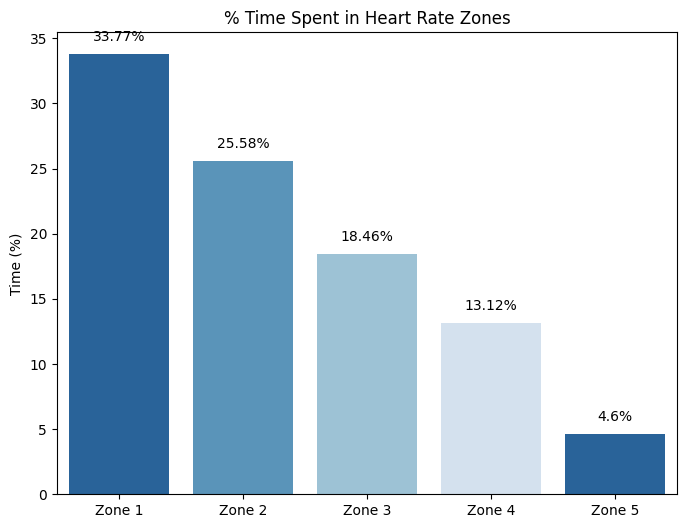

In [6]:
# Define a custom color palette with shades of blue
colors = sns.color_palette("Blues_r", 4)

# create a bar chart using seaborn
plt.figure(figsize=(8,6))
sns.barplot(x='HR Zone', y='Avg Time', data=plot_data, palette=colors)

# add percentage labels on top of each bar
for index, row in plot_data.iterrows():
    plt.text(index, row['Avg Time']+1, str(round(row['Avg Time'],2))+'%', ha='center')

# set the chart title and axis labels
plt.title('% Time Spent in Heart Rate Zones')
plt.xlabel('')
plt.ylabel('Time (%)')

# display the chart
plt.show()

(50.0, 200.0)

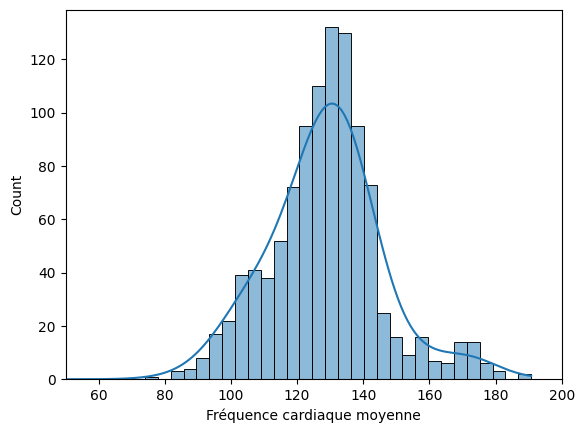

In [7]:
sns.histplot(data=df, x='Fréquence cardiaque moyenne', kde=True)
plt.xlim(50,200)

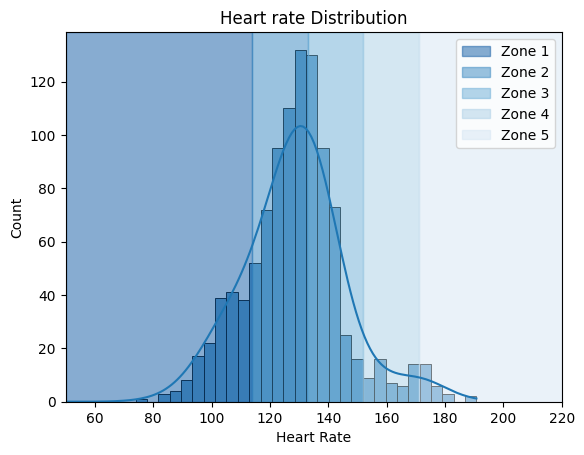

In [8]:
import seaborn as sns

# Define the HR zones
zones = {'Zone 1': (50, 114), 'Zone 2': (114, 133), 'Zone 3': (133, 152), 'Zone 4': (152, 171), 'Zone 5': (171, 220)}

# Define a custom color palette with shades of blue
colors = sns.color_palette("Blues_r", 5)

# Plot the histogram with the custom color palette
ax = sns.histplot(data=df, x='Fréquence cardiaque moyenne', kde=True, palette=colors, alpha=0.7)

# Color each bar based on its HR zone
for zone, values in zones.items():
    ax.axvspan(values[0], values[1], alpha=0.5, color=colors[list(zones.keys()).index(zone)], label=zone)

# Set the x-axis limits and labels
ax.set_xlim(50, 220)
ax.set_xlabel('Heart Rate')
ax.set_title("Heart rate Distribution")

# Add a legend
ax.legend()

# Show the plot
plt.show()


### Ride Map

In [12]:
def plot_ride_map(csv_file):
    """
    Plot a ride map using latitude and longitude data from a CSV file.

    Parameters:
    -----------
    csv_file : str
        Path to the CSV file containing latitude and longitude data.

    Returns:
    --------
    None
    """
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Check if the latitude and longitude columns exist in the DataFrame
    if 'latitude' in df.columns and 'longitude' in df.columns:
        # Extract the latitude and longitude data
        latitudes = df['latitude']
        longitudes = df['longitude']
    elif 'position_lat' in df.columns and 'position_long' in df.columns:
        # Extract the position_lat and position_long data and convert to floating-point values
        latitudes = df['position_lat'] / (2**32/360)
        longitudes = df['position_long'] / (2**32/360)
    else:
        raise ValueError("CSV file does not contain latitude and longitude data.")

    # Create a Polyline object from the latitude and longitude data
    locations = list(zip(latitudes, longitudes))
    line = Polyline(
        locations=locations,
        color="green",
        fill=False
    )

    # Create a Map object and add the Polyline to it
    center_lat = np.mean(latitudes)
    center_long = np.mean(longitudes)
    m = Map(center=(center_lat, center_long), zoom=12)
    m.add_layer(line)

    # Display the Map object
    display(m)


In [13]:
plot_ride_map('data/activities_csv/1989387789.csv')

Map(center=[45.06310172667161, 5.721469493943025], controls=(ZoomControl(options=['position', 'zoom_in_text', …

## Power Distribution

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

def plot_power(csv_path, activities_csv_path):
    """
    Reads a CSV file and plots the power, heart rate, cadence, and speed over time, if the file has the corresponding columns.

    Parameters:
    -----------
    csv_path : str
        Path to the CSV file.

    Returns:
    --------
    None
    """
    # Read the CSV file
    df = pd.read_csv(csv_path)

    # Convert the timestamp column to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Check if the file has a 'power' column
    if 'power' in df.columns:
        # Check if the 'power' column is not completely null
        if not df['power'].isnull().all():
            # Get the activity_id from the CSV file name
            activity_id = activity_id = df["activity_id"][0]

            # Read the activities CSV file
            activities_df = pd.read_csv(activities_csv_path)

            # Find the row with the matching activity_id
            activity_row = activities_df.loc[activities_df["ID de l'activité"] == activity_id]

            # Get the ride date, distance, and duration
            ride_date = activity_row["Date de l'activité"].values[0]
            ride_distance = float(activity_row['Distance'].values[0].replace(',', '.'))
            ride_duration = activity_row['Temps écoulé'].values[0]

            # Convert the duration from seconds to h:min
            ride_duration = int(activity_row['Temps écoulé'].values[0])
            hours, remainder = divmod(ride_duration, 3600)
            minutes, seconds = divmod(remainder, 60)
            ride_duration_str = f"{hours:02d}:{minutes:02d}"

            # Convert speed from m/s to km/h
            df['speed'] = df['speed'] * 3.6

            # Plot the power, heart rate, cadence, and speed over time
            fig, axs = plt.subplots(nrows=4, figsize=(20, 16), sharex=True)
            axs[0].plot(df['timestamp'], df['power'])
            axs[0].set_title(f'Power over Time\n\nDate Activité: {ride_date}\nDistance: {float(ride_distance):.1f} km\nDurée: {ride_duration_str}', fontweight='bold')
            axs[1].plot(df['timestamp'], df['cadence'], color='green')
            axs[1].set_title('Cadence over Time', fontweight='bold')
            axs[2].plot(df['timestamp'], df['speed'], color='orange')
            axs[2].set_title('Speed over Time', fontweight='bold')
            axs[3].plot(df['timestamp'], df['heart_rate'], color='red')
            axs[3].set_title('Heart Rate over Time', fontweight='bold')
            axs[3].set_xlabel('Time')

            # Set y-axis labels
            axs[0].set_ylabel('Power')
            axs[1].set_ylabel('Cadence')
            axs[2].set_ylabel('Speed (km/h)')
            axs[3].set_ylabel('Heart Rate')

            # Set x-axis ticks every 10 minutes
            axs[3].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
            axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
           

            # Rotate x-axis tick labels
            plt.setp(axs[3].get_xticklabels(), rotation=45, ha='right')

            plt.show()
        else:
            print('The power column is completely null.')
    else:
        print('File does not have a power column.')


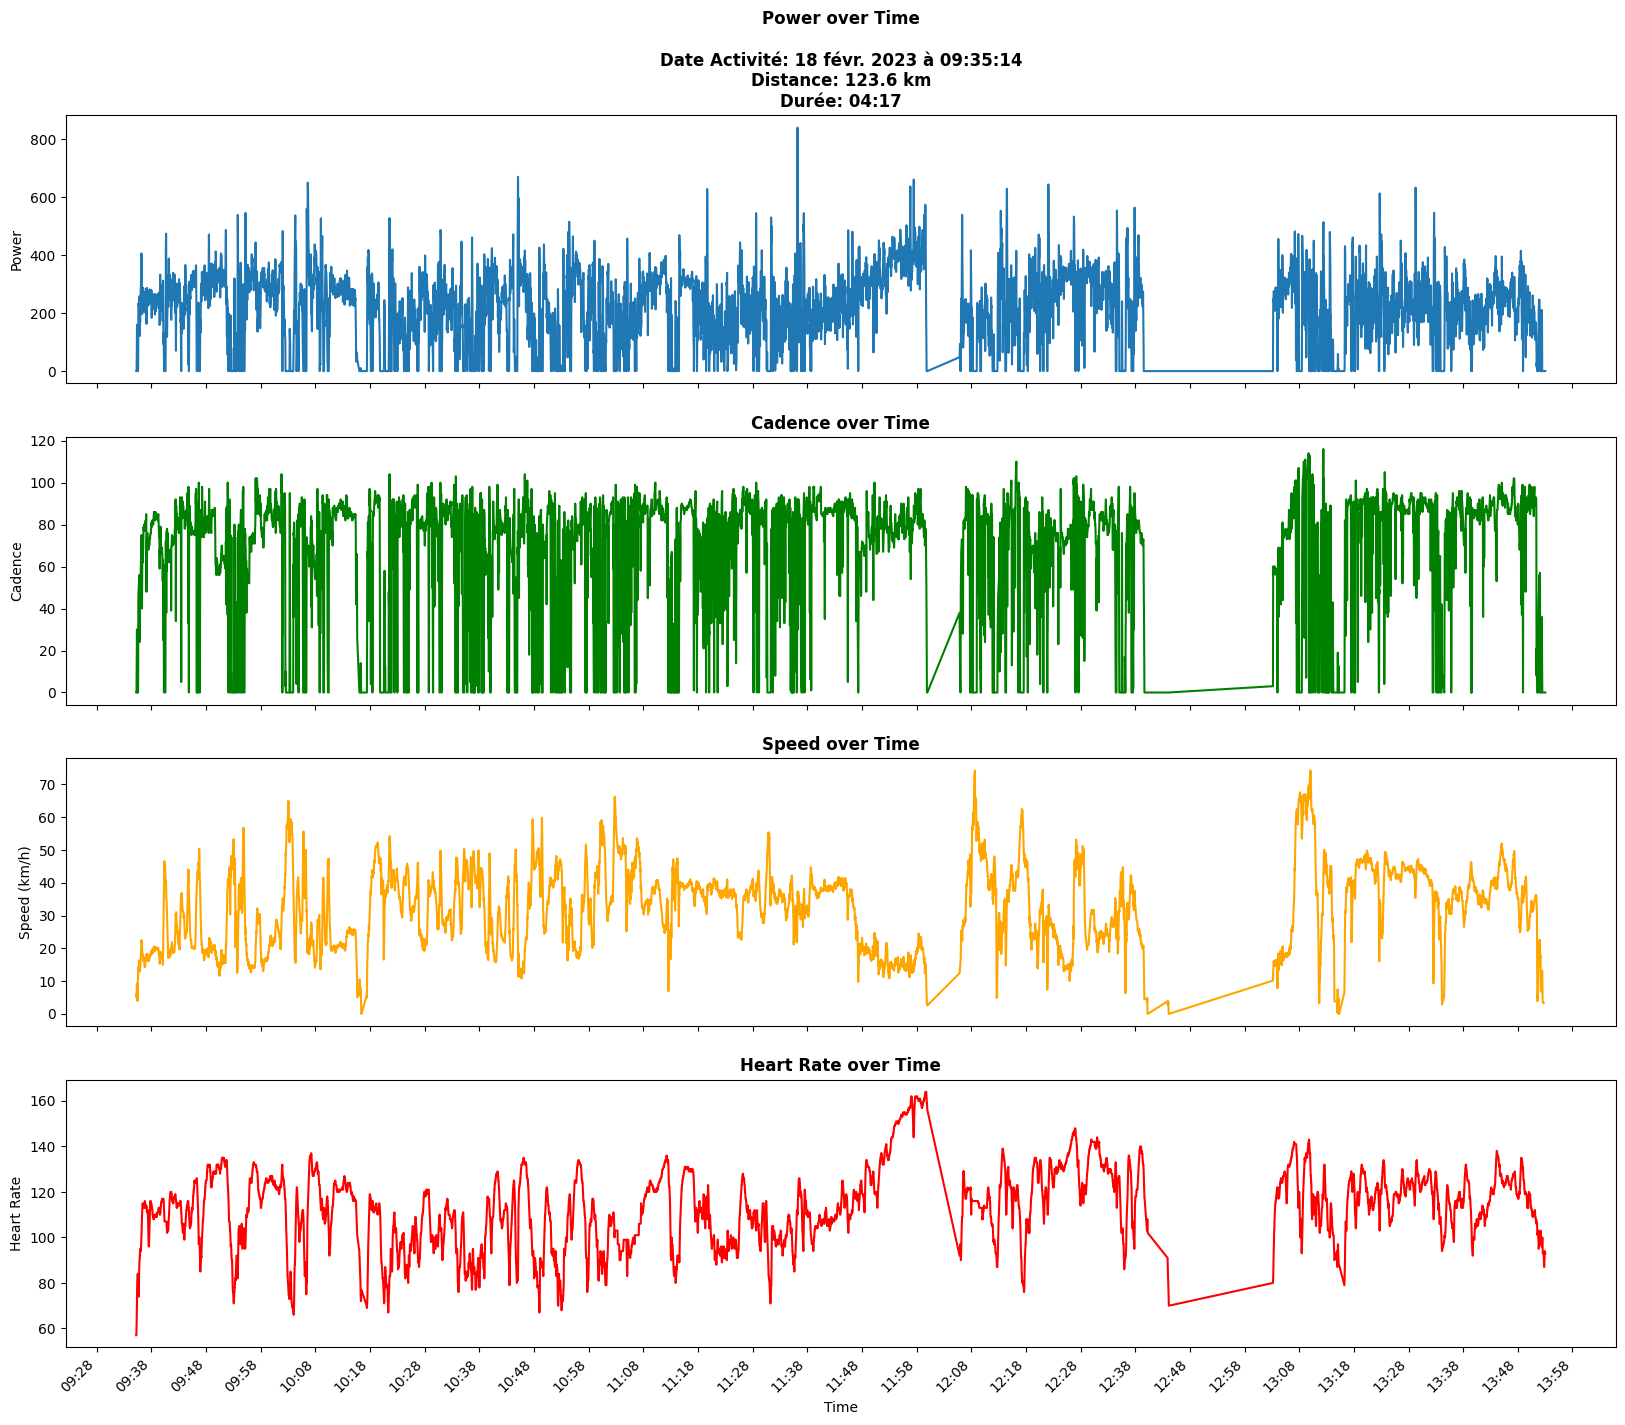

In [15]:
plot_power('data/activities_csv/9212811005.csv', "data/activities.csv")


In [17]:
df_visuals = pd.read_csv("data/activities_csv/9212811005.csv")

<AxesSubplot: xlabel='power', ylabel='Count'>

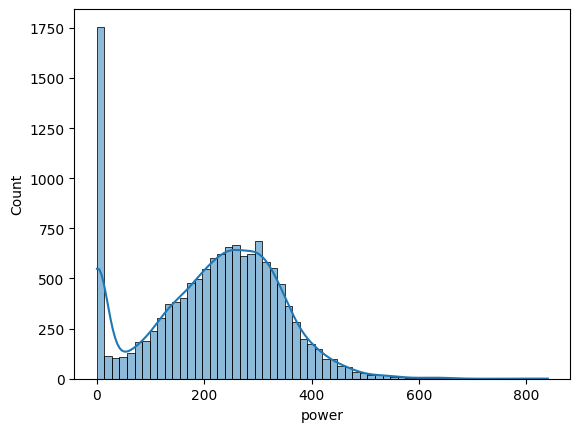

In [18]:
sns.histplot(data=df_visuals, x='power', kde=True)

<AxesSubplot: xlabel='Cadence moyenne', ylabel='Count'>

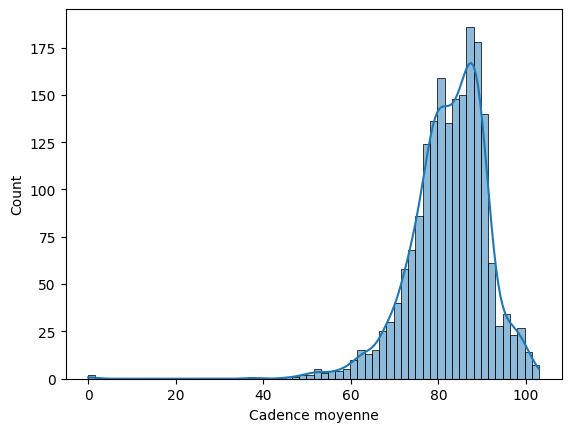

In [10]:
sns.histplot(data=activities_data, x='Cadence moyenne', kde=True)

# Ride Frequency

#### Weekly

<AxesSubplot: >

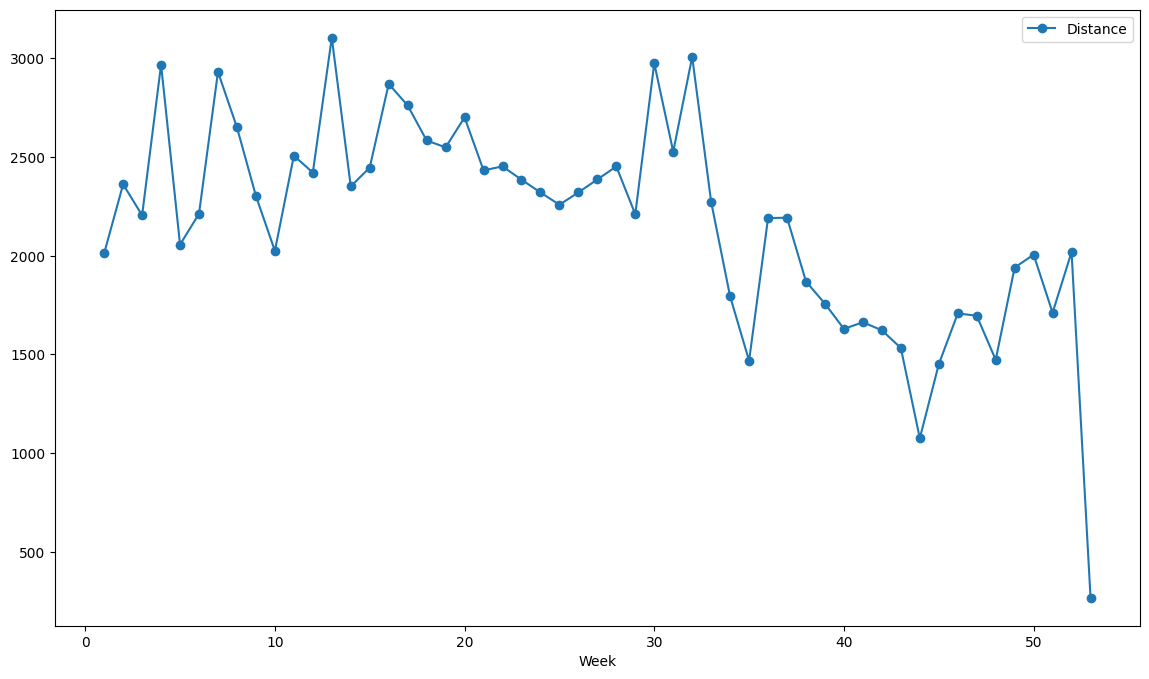

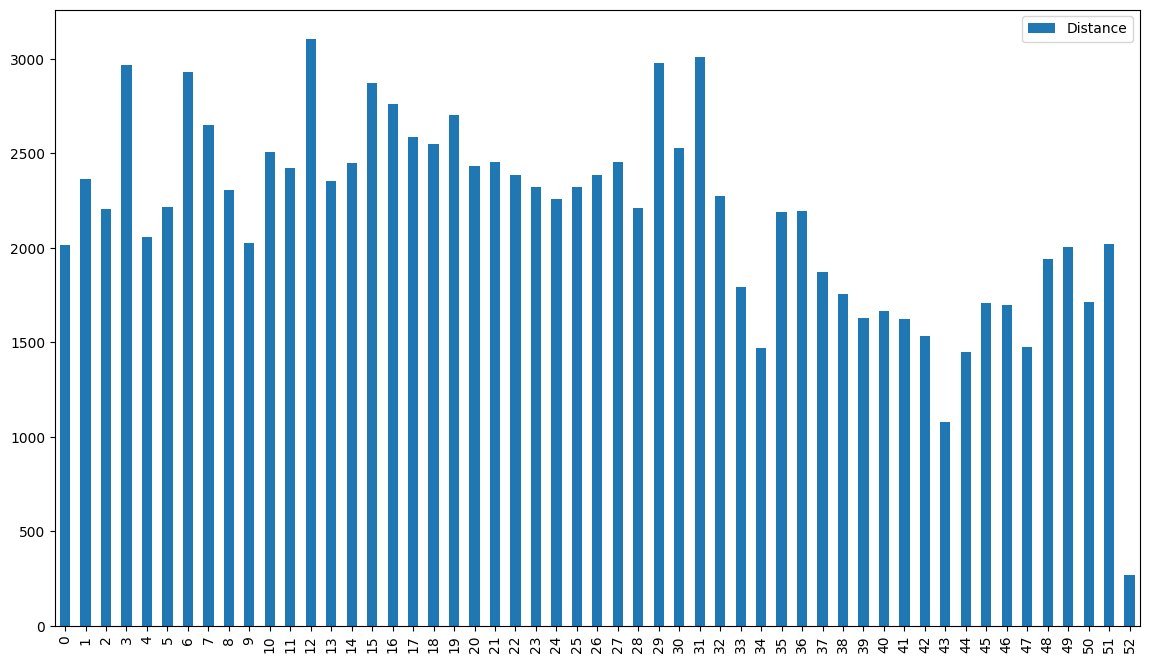

In [6]:
df_week = activities_data.groupby('Week')['Distance'].sum().reset_index().sort_values('Week')
#print (df)

df_week.plot(x='Week',y='Distance', marker='o', figsize=(14,8))
df_week.plot(y="Distance", kind="bar", figsize=(14,8))

#### Monthly

<AxesSubplot: >

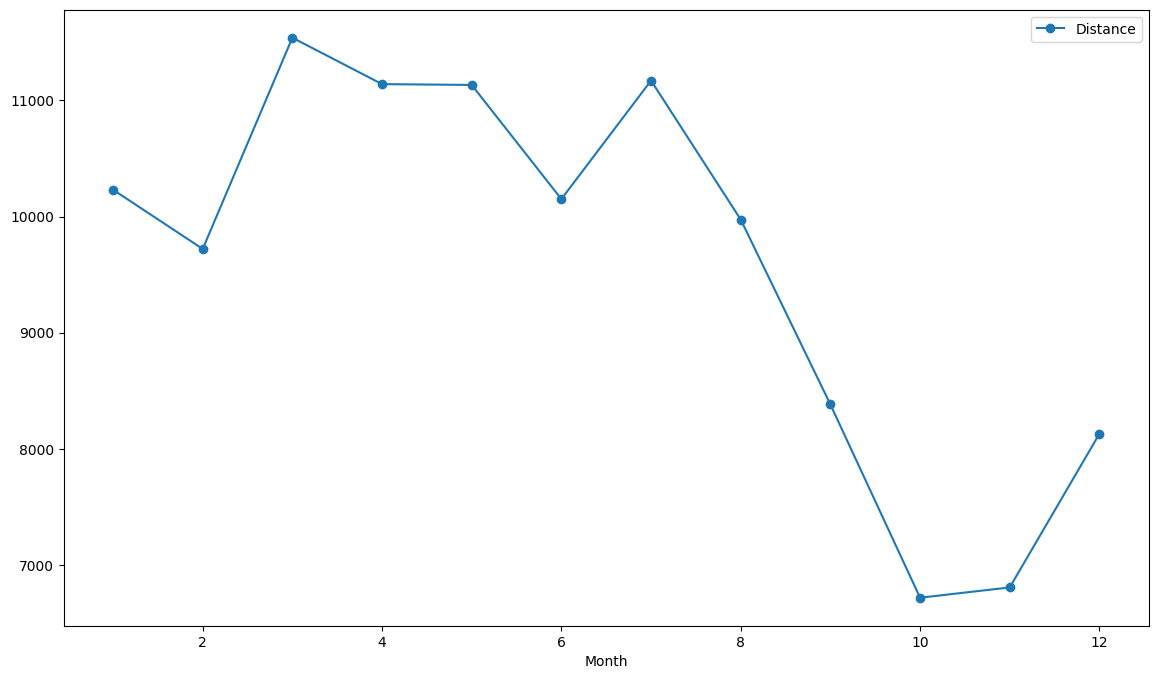

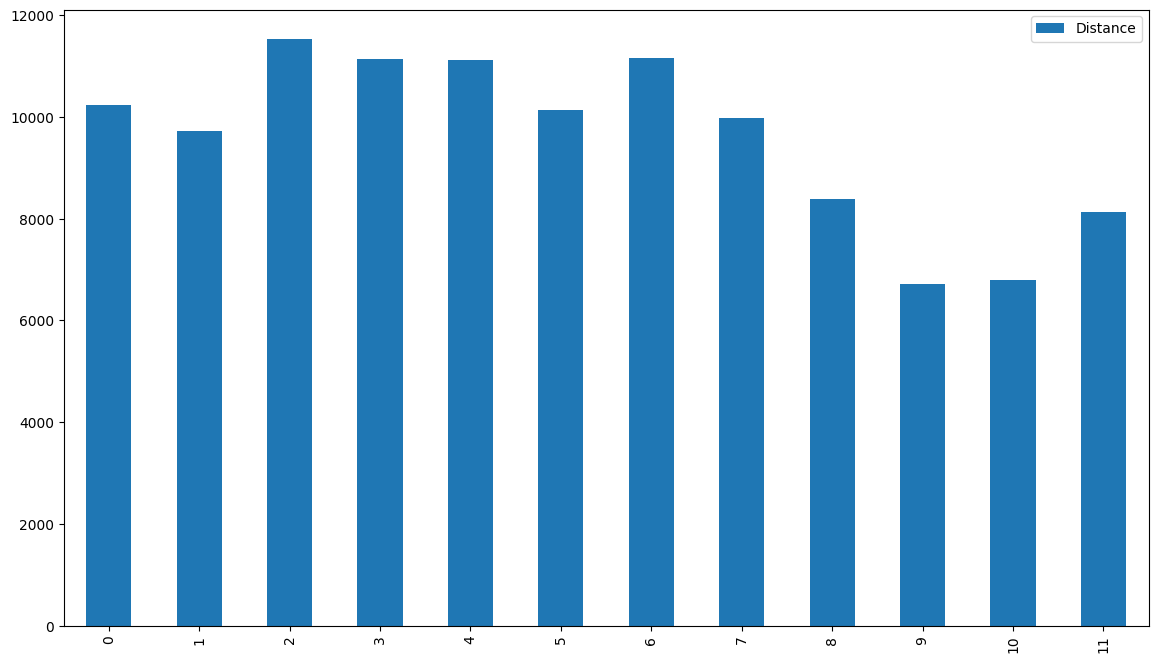

In [7]:
df_month = activities_data.groupby('Month')['Distance'].sum().reset_index().sort_values('Month')
#print (df)

df_month.plot(x='Month',y='Distance', marker='o', figsize=(14,8))
df_month.plot(y="Distance", kind="bar", figsize=(14,8))

#### Daily

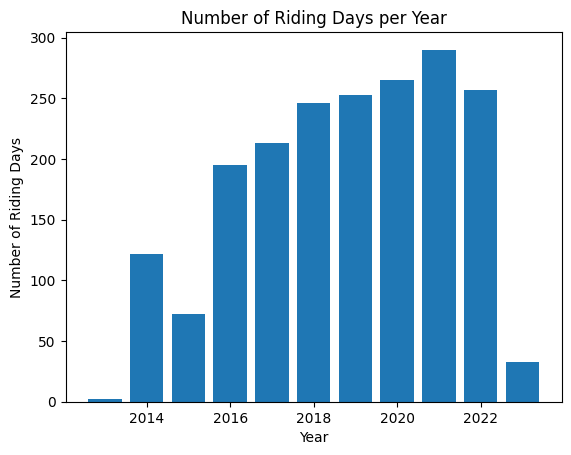

In [9]:
# Group the data by year and count the number of unique days with an activity
riding_days_per_year = activities_data.groupby(activities_data['Date'].dt.year)['Date'].nunique()

# Create a bar chart
plt.bar(riding_days_per_year.index, riding_days_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Riding Days')
plt.title('Number of Riding Days per Year')
plt.show()